# Imports

#### Basic Imports

In [1]:
import analysis
import itertools as itr
import numpy as np

#### Plotting imports and style

In [2]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
sns.set()

mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

# Algorithm parameters

In [3]:
algs = ['dci-c', 'dci-fc', 'pcalg', 'ges']
alg_display_names = ['DCI-C', 'DCI-FC', 'PC', 'GES']
nsamples_list = [1000, 10000]
colors = sns.color_palette()
linestyles = ['-', '--']

#### handles for plots

In [4]:
alg_handles = [mpatches.Patch(color=color, label=alg) for alg, color in zip(alg_display_names, colors)]
sample_handles = [
    mlines.Line2D([], [], color='k', linestyle=linestyle, label='$n$={:,}'.format(nsamples)) 
    for nsamples, linestyle in zip(nsamples_list, linestyles)
]
all_handles = list(itr.chain.from_iterable(itr.zip_longest(alg_handles, sample_handles, fillvalue=mlines.Line2D([0], [0], alpha=0))))

# Data

In [5]:
skeleton_da = analysis.get_skeleton_da('fig1_data', algs, nsamples_list, [1e-5, 1e-4, 1e-3, 1e-2, 1e-1])
exact_recovery_skeleton_da = analysis.edges_da2_exact_recovery(skeleton_da)

In [6]:
edges_da = analysis.get_edges_da('fig1_data', algs, nsamples_list, [1e-5, 1e-4, 1e-3, 1e-2, 1e-1])
exact_recovery_da = analysis.edges_da2_exact_recovery(edges_da)

# Figures

#### Figure 1a

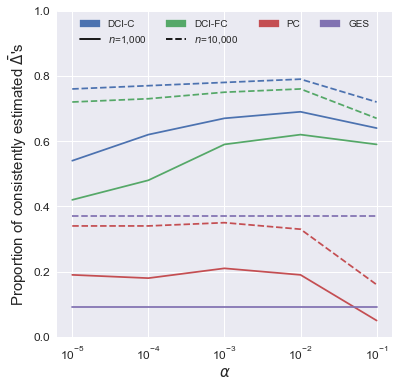

In [8]:
plt.figure(figsize=(6,6))

alphas = exact_recovery_da.coords['alpha'].values
for (alg, color), (nsamples, linestyle) in itr.product(zip(algs, colors), zip(nsamples_list, linestyles)):
    exact_recovery = exact_recovery_skeleton_da.sel(alg=alg, nsamples=nsamples)
    plt.plot(alphas, exact_recovery, color=color, linestyle=linestyle)
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylim([0, 1])
plt.ylabel(r"Proportion of consistently estimated $\bar{\Delta}$'s")
plt.legend(handles=all_handles, ncol=4, loc='upper center', bbox_to_anchor=(.5, 1), shadow=True);

#### Figure 1b

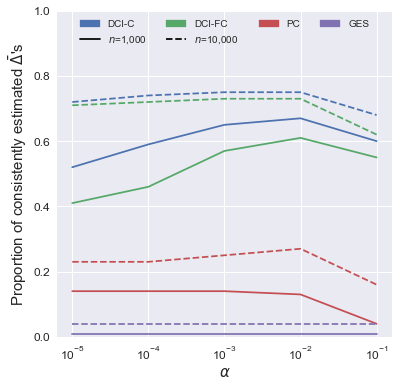

In [12]:
plt.figure(figsize=(6,6))

alphas = exact_recovery_da.coords['alpha'].values
for (alg, color), (nsamples, linestyle) in itr.product(zip(algs, colors), zip(nsamples_list, linestyles)):
    exact_recovery = exact_recovery_da.sel(alg=alg, nsamples=nsamples)
    plt.plot(alphas, exact_recovery, color=color, linestyle=linestyle)
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylim([0, 1])
plt.ylabel(r"Proportion of consistently estimated $\Delta$'s")
plt.legend(handles=all_handles, ncol=4, loc='upper center', bbox_to_anchor=(.5, 1), shadow=True);